## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head()


#study_results.head()
# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
#merge_df.value_counts()


cleanMerge = merge_df[merge_df['Mouse ID'] != "g989"]
cleanMerge.value_counts()
# Display the data table for preview
#merge_df.value_counts()
#mouse_metadata.value_counts('Mouse ID')

#df_clean = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
#df_clean.value_counts()


#counts = StudyIDT.value_counts()

#res = StudyIDT[~StudyIDT.isin(counts[counts < 2].index)]
#res.value_counts()





Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
z969      Naftisol      Male    9           30          45         73.867845           4                   1
i386      Infubinol     Female  23          29          20         55.087724           2                   1
i334      Ramicane      Female  8           20          10         41.631247           0                   1
                                                        15         39.158001           0                   1
                                                        20         39.687832           0                   1
                                                                                                          ..
q633      Zoniferol     Male    12          25          5          47.183802           0                   1
                                                        10         49.001866           0                   1
                        

In [2]:
# Checking the number of mice.
MouseCount = cleanMerge['Mouse ID'].nunique()
MouseCount2 = merge_df['Mouse ID'].nunique()
print(MouseCount)
print(MouseCount2)

248
249


In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [ ]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleanMerge.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
cleanMergeGroup = cleanMerge.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
Count = cleanMergeGroup['Tumor Volume (mm3)'].count()
Mean = cleanMergeGroup['Tumor Volume (mm3)'].mean()
Median = cleanMergeGroup['Tumor Volume (mm3)'].median()
Variance = cleanMergeGroup['Tumor Volume (mm3)'].var()
StDev = cleanMergeGroup['Tumor Volume (mm3)'].std()
SEM = cleanMergeGroup['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
TumorVolumeSummary= pd.DataFrame({"RowCount": Count,
                      "Mean": Mean,
                      "Median": Median,           
                      "Variance": Variance,
                      "Standard Deviation":StDev,
                      "SEM":SEM})

TumorVolumeSummary


,RowCount,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

cleanMergeGroup.agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']}) 
 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

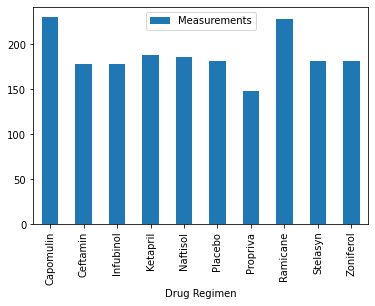

In [5]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
DrugList = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
Measurements = [230,178,178,188,186,181,148,228,181,182]

df = pd.DataFrame({'Drug Regimen':DrugList, 'Measurements':Measurements})
ax = df.plot.bar(x='Drug Regimen', y='Measurements', rot=90)



([<matplotlib.axis.XTick at 0x230f9a300d0>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

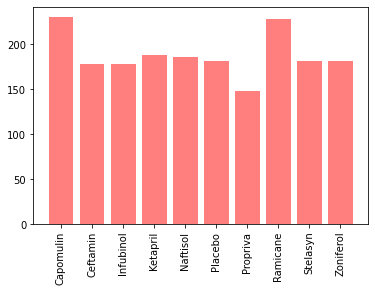

In [6]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
DrugList = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
Measurements = [230,178,178,188,186,181,148,228,181,182]


x_axis = np.arange(len(DrugList))
plt.bar(x_axis, Measurements, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, DrugList,rotation = 90)



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
